In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

Dalam praktikum ke-5 ini, anda akan mengimplementasi 
_regularized linear regression_ dan menggunakannya untuk
mempelajari model-model dengan sifat _bias-variance_ yang berbeda.

# 1. Regularized Linear Regression

Bagian pertama dari praktikum membahas bagaimana anda 
akan mengimplementasi regularized linear regression untuk
memprediksi jumlah air yang mengalir keluar dari bendungan
dengan menggunakan perubahan ketinggian air di dalam waduk.

## 1.1 Visualisasi dataset
Kita akan mulai dengan memvisualisasikan dataset yang berisi 
history tentang perubahan ketinggian air, $x$, dan jumlah air 
yang mengalir keluar dari bendungan, $y$.

This dataset is divided into three parts:
- Data latih (_train set_) yang akan dipelajari oleh model
  anda: `X`, `y`
- Data validasi (_validation set_) untuk menentukan parameter
 regularisasi: `Xval`, `yval`
- Data uji (_test set_) untuk mengevaluasi kinerja model anda.
  Ini adalah contoh-contoh data "tak terlihat" yang tidak dilihat
   model anda selama _training_: `Xtest`, `ytest`

Selanjutnya, kita akan plot the training data sbb:

Loading and Visualizing data ...


Text(0, 0.5, 'Water folowing out of the dam (y)')

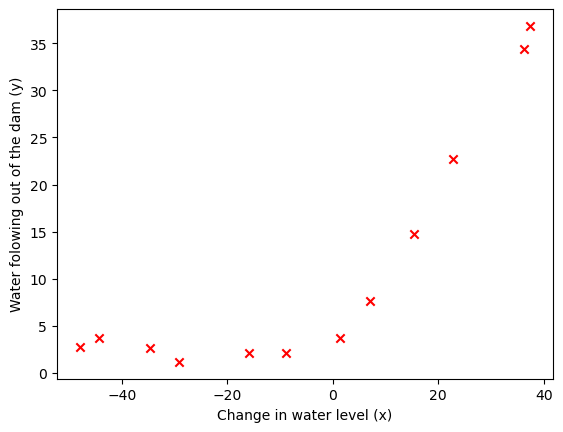

In [2]:
plt.ion()
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

# Load Training data
print('Loading and Visualizing data ...')

# Load from ex5data1:
data = scio.loadmat('ex5data1.mat')
X = data['X']
y = data['y'].flatten()
Xval = data['Xval']
yval = data['yval'].flatten()
Xtest = data['Xtest']
ytest = data['ytest'].flatten()

m = y.size

# Plot training data
plt.figure()
plt.scatter(X, y, c='r', marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')

## 1.2 Regularized linear regression cost function
Seperti yang sudah dijelaskan di kelas bahwa _regularized 
linear regression_ memiliki _cost function_ berikut:

$$
   J(\theta) = \underbrace{ \frac{1}{2m} \left( \sum_{i=1}^m 
   ( h_\theta(x^{(i)}) - y^{(i)} )^2 \right) }_{\text{MSE}}  + 
   \underbrace{\frac{\alpha}{2m} \left( \sum_{j=1}^n{\theta_j^2} 
   \right)}_{\text{suku regularisasi}} 
$$

dengan $\alpha$ adalah parameter regularisasi yang mengontrol derajat regularisasi.

Suku regularisasi memberi penalti pada keseluruhan _cost function_ $J$. 
Saat parameter model $θ_j$ meningkat, penalti juga meningkat. 
Perhatikan bahwa anda sebaiknya tidak mengatur suku $θ_0$.

### Tugas anda
- Anda sekarang harus melengkapi fungsi `linearRegCostFunction`.
- Tugas anda adalah menulis fungsi untuk menghitung fungsi biaya regresi linier teregulasi.
- Jika memungkinkan, cobalah untuk membuat kode program anda dalam bentuk _vectorized_ dan hindari menulis loop. 
Ketika anda selesai, anda akan menjalankan fungsi `linearRegCostFunction` anda dengan menggunakan $\theta$ yang diinisialisasi di \[1, 1\]. Hasilnya, anda akan melihat output `303.993`.

## 1.3 Regularized linear regression gradient
Gradient dalam kasus ini terdiri dari 2 bagian, yaitu:
$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)}) x_0^{(i)}}
$$

dan

$$
\frac{\partial J(\theta)}{\partial \theta_1} = \left( \frac{1}{m} \sum_{i=1}^m{ ( h_\theta(x^{(i)}) - y^{(i)} ) x_1^{(i)} } + \frac{\alpha}{m} \theta_1 \right).    
$$

Dalam implementasi kode dalam fungsi `linear_reg_cost_function`, $J$ diwakili oleh `cost` dan 

$$
\texttt{grad} = \begin{bmatrix}
        \frac{\partial J(\theta)}{\partial \theta_0} \\
        \frac{\partial J(\theta)}{\partial \theta_1}
    \end{bmatrix}
$$

In [3]:
def linear_reg_cost_function(theta, x, y, alpha):
    # Initialize some useful values
    m = y.size

    # You need to return the following variables correctly
    cost = 0
    grad = np.zeros(theta.shape)

    error = np.dot(x, theta) - y

    cost = (1 / (2 * m)) * np.sum(np.square(error)) + \
(alpha / (2 * m)) * np.sum(np.square(theta[1:]))

    grad = (1 / m) * np.dot(x.T, error)
    grad[1:] = grad[1:] + (alpha / m) * theta[1:]

    return cost, grad

Kita jalankan fungsi `linearRegCostFunction` dengan menggunakan theta bernilai `[1, 1]`.

In [4]:
theta = np.ones(2)
cost, _ = linear_reg_cost_function(theta, np.c_[np.ones(m), X], y, 1)

Kita cetak `cost` pada saat `theta = [1 1]`. 

In [5]:
print(f'Cost at theta = [1  1]: {cost:0.6f}\n(this value should be about 303.993192')

Cost at theta = [1  1]: 303.993192
(this value should be about 303.993192


Selanjutnya, kita akan coba menghitung gradient yang disimpan dalam variabel `grad`.

In [6]:
theta = np.ones(2)
cost, grad = linear_reg_cost_function(theta, np.c_[np.ones(m), X], y, 1)

print('Gradient at theta = [1  1]: {}\n(this value should\
be about [-15.303016  598.250744]'.format(grad))

Gradient at theta = [1  1]: [-15.303016  598.250744]
(this value shouldbe about [-15.303016  598.250744]


## 1.4 Melatih Model Linear Regression

Kita definisikan fungsi `train_linear_reg` yang akan menghitung `theta` dengan _cost_ paling minimum.

In [7]:
import numpy as np
import scipy.optimize as opt

# ===========================
#   Jangan diubah ya
# ===========================
def train_linear_reg(x, y, alpha):
    initial_theta = np.ones(x.shape[1])

    def cost_func(t):
        return linear_reg_cost_function(t, x, y, alpha)[0]

    def grad_func(t):
        return linear_reg_cost_function(t, x, y, alpha)[1]

    theta, *unused = opt.fmin_cg(cost_func, initial_theta, grad_func, maxiter=200, disp=False,
                                     full_output=True)

    return theta

Selanjutnya kita panggil method `train_linear_reg` untuk mendapatkan `theta` terbaik dan plot garis regresinya. 

Text(0, 0.5, 'Water folowing out of the dam (y)')

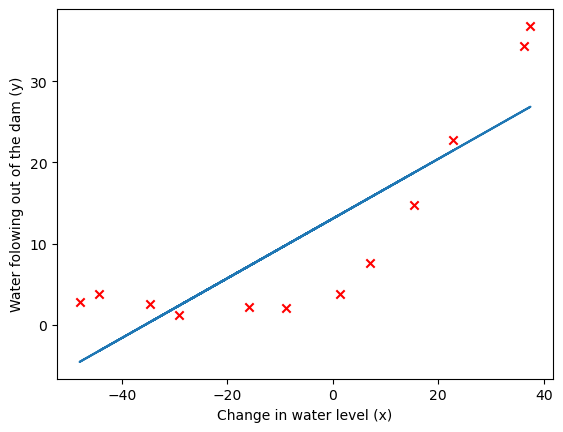

In [8]:
# Train linear regression with alpha = 0
alpha = 0

theta = train_linear_reg(np.c_[np.ones(m), X], y, alpha)

# Plot fit over the data
plt.plot(X, np.dot(np.c_[np.ones(m), X], theta))

plt.scatter(X, y, c='r', marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')

### Pertanyaan Refleksi
Apakah model regresi linier yang dibuat cocok dengan 
dataset yang ada? ya, g menyesuaikan diri dengan data. 
Garis biru (model regresi linier) tampaknya
mengikuti pola titik-titik merah (data) dengan cukup baik.

- Meskipun visualisasi untuk mengetahui kecocokan model yang paling sesuai seperti yang ditunjukkan di atas adalah salah satu cara yang mungkin untuk men-debug algoritma pembelajaran anda, memvisualisasikan data dan model tidaklah selalu mudah.
- Di bagian berikutnya, anda akan mengimplementasikan fungsi untuk menghasilkan kurva pembelajaran (_learning curve_) yang dapat membantu anda men-debug algoritma pembelajaran jika memvisualisasikan data sulit untuk dilakukan.

# 2. Bias-variance
Konsep penting dalam machine learning adalah pertukaran bias-variance tradeoff. Model dengan **bias tinggi** tidak cukup kompleks untuk data dan cenderung _underfit_, sedangkan model dengan **variance tinggi** mengalami overfit dengan training data.

Pada bagian latihan ini, anda akan memplot training dan test errors pada dengan kurva pembelajaran (_learning curve_) untuk mendiagnosa masalah bias-variance.

## 2.1 Learning curve
Anda sekarang akan mengimplementasi kode untuk menghasilkan _learning curve_ yang akan berguna dalam men-debug algoritme machine learning.

Ingatlah bahwa _learning curve_ memplot training dan validation error sebagai fungsi dari ukuran training set. 

Tugas anda adalah melengkapi fungsi `learning_curve` sehingga fungsi mengembalikan vektor error untuk training set dan validation set.

In [9]:
def learning_curve(X, y, Xval, yval, alpha):
    # Number of training examples
    m = X.shape[0]

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    for i in range(m):
        x_i = X[:i+1]
        y_i = y[:i+1]
        theta = train_linear_reg(x_i,y_i,alpha)

        error_train[i], _ = linear_reg_cost_function(theta, x_i, y_i, 0)
        error_val[i], _ = linear_reg_cost_function(theta, Xval, yval, 0)

    return error_train, error_val

Untuk memplot learning curve, kita memerlukan training set dan validation error untuk _training set size_ yang berbeda. 

(0.0, 13.0, 0.0, 150.0)

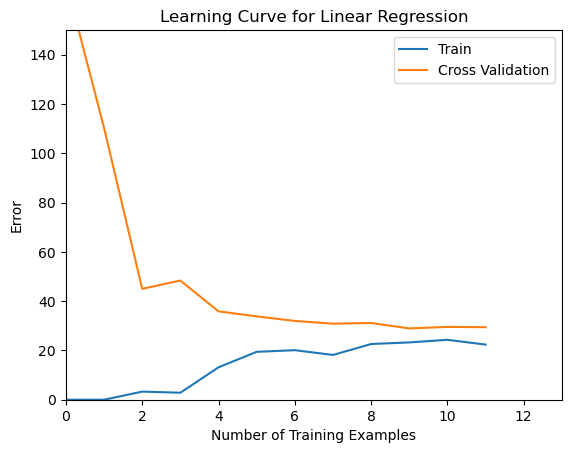

In [10]:
alpha = 0
error_train, error_val = learning_curve(np.c_[np.ones(m), X], y, np.c_[np.ones(Xval.shape[0]), Xval], yval, alpha)

plt.figure()
plt.plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Learning Curve for Linear Regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

## Pertanyaan Refleksi
Bagaimanakah _performance_ dari model linear regression di atas?
Garis biru (Train) menunjukkan error training dan garis oranye 
(Cross Validation) menunjukkan error validasi. Kedua garis 
tersebut tampaknya konvergen dan stabil di sekitar nilai error 
20, yang menunjukkan bahwa model Anda mungkin memiliki bias 
rendah dan variance rendah, dan oleh karena itu, memiliki 
performa yang baik.

**Hint**: Jelaskan dari konsep bias-nya

# Polynomial regression
- Masalah dengan model linier yang sudah dibuat adalah model linier terlalu sederhana untuk data dan menghasilkan underfitting (bias tinggi). 
- Di bagian latihan ini, anda akan mengatasi masalah ini dengan menambahkan lebih banyak fitur.

Untuk menggunakan regresi polinomial (_polynomial regression_), hipotesis anda akan berbentuk:

$$
\begin{align}
    h_\theta(x) &= \theta_0 + \theta_1 \times (\text{waterLevel}) + \theta_2 \times (\text{waterLevel})^2 + \cdots + \theta_p \times (\text{waterLevel})^p \\
                &= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p. 
\end{align}
$$

Perhatikan bahwa dengan mendefinisikan $x_1 = (\text{waterLevel})$, $x_2 = (\text{waterLevel})^2$, $\ldots$, $x_p = (\text{waterLevel})^p$, anda memperoleh model regresi linier dengan fiturnya adalah berbagai pangkat dari nilai asli ($\text{waterLevel}$).

In [17]:
def poly_features(X, p):
    # Inisialisasi matriks fitur polinomial
    X_poly = np.zeros((X.size, p))

    P = np.array([i for i in range(1, p+1)])
    
    for i in range(p):
        X_poly[:,i] = X.flatten()**(i+1)

    return X_poly

In [18]:
# =====================
#   Jangan diubah ya
# =====================
import matplotlib.pyplot as plt

def plot_fit(min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05)

    X_poly = poly_features(x, p)
    X_poly -= mu
    X_poly /= sigma

    X_poly = np.c_[np.ones(x.size), X_poly]

    plt.plot(x, np.dot(X_poly, theta))

## 3.1 Polynomial regression

Setelah anda melengkapi fungsi `poly_features`, anda akan melanjutkan dengan melatih regresi polinomial menggunakan cost function regresi linier anda.

Untuk bagian latihan ini, anda akan menggunakan polinomial berderajat $8$.
Ternyata jika anda melatih pada data yang diproyeksikan (data berpolinomial berderajat $8$), _training_ tidak akan berjalan dengan baik karena fitur akan diskalakan dengan amat buruk (misalnya, contoh dengan $x = 40$ sekarang akan memiliki fitur $x^8 = 40^8 = 6,5 × 10^{12}$). Oleh karena itu, anda perlu menggunakan normalisasi fitur (_feature normalization_).

In [19]:
# =======================
#    Jangan diubah ya
# =======================
import numpy as np

def feature_normalize(X):
    mu = np.mean(X, 0)
    sigma = np.std(X, 0, ddof=1)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [20]:
# =======================
#    Jangan diubah ya
# =======================
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = poly_features(X, p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = np.c_[np.ones(m), X_poly]

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = poly_features(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.c_[np.ones(X_poly_test.shape[0]), X_poly_test]

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = poly_features(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.c_[np.ones(X_poly_val.shape[0]), X_poly_val]

print('Normalized Training Example 1 : \n{}'.format(X_poly[0]))

Normalized Training Example 1 : 
[ 1.000000 -0.362141 -0.755087  0.182226 -0.706190  0.306618 -0.590878
  0.344516 -0.508481]


Polynomial Regression (alpha = 100)
# Training Examples	Train Error		Validation Error
  	0		1.4437140641676042e-27	138.84677697582552
  	1		0.11410676145735983	144.12523056194405
  	2		106.95656783966628	70.86326961158125
  	3		121.7408770978384	78.37293788926188
  	4		102.94946035776512	63.845046836888834
  	5		97.16984651340138	59.532626030069906
  	6		83.32653795165436	59.585493003493475
  	7		76.49182516085696	58.699842231087906
  	8		71.29717920607455	59.56446296072527
  	9		64.35063565377966	59.73134436013239
  	10		58.99794469627224	60.409871674681845
  	11		57.97707721752698	57.84219068734752


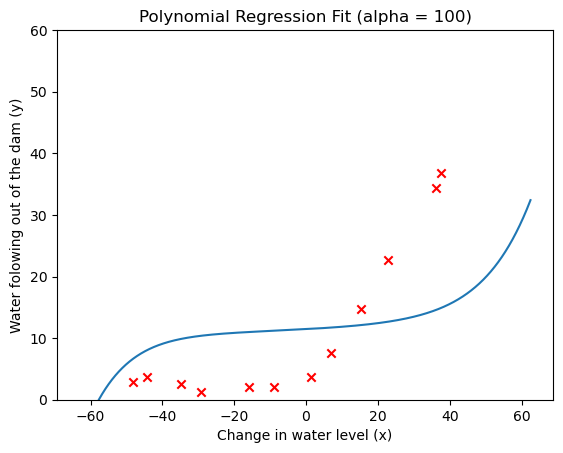

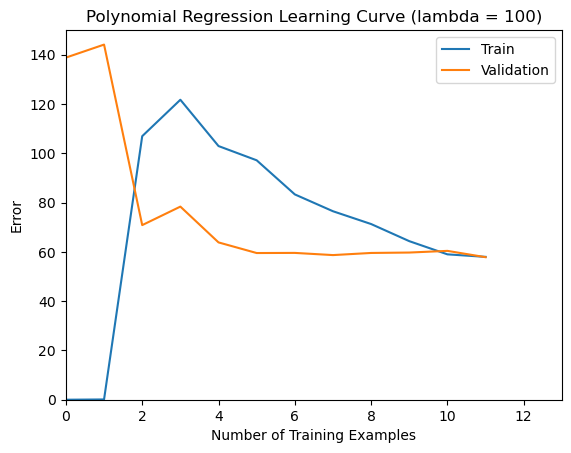

In [24]:
alpha = 100
theta = train_linear_reg(X_poly, y, alpha)

# Plot training data and fit
plt.figure()
plt.scatter(X, y, c='r', marker="x")
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')
plt.ylim([0, 60])
plt.title('Polynomial Regression Fit (alpha = {})'.format(alpha))

error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, alpha)
plt.figure()
plt.plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(alpha))
plt.legend(['Train', 'Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('Polynomial Regression (alpha = {})'.format(alpha))
print('# Training Examples\tTrain Error\t\tValidation Error')
for i in range(m):
    print('  \t{}\t\t{}\t{}'.format(i, error_train[i], error_val[i]))

### Pertanyaan Refleksi
1. Apakah model _polynomial regression_ cocok dengan dataset?
   Dilihat model regresi polinomial ini telah melakukan pekerjaan
yang baik dalam menyesuaikan diri dengan data. Garis biru
(model regresi polinomial) tampaknya mengikuti pola titik-
titik merah (data) dengan cukup baik.

2. Jelaskan _training error_ yang terjadi? Training error adalah
perbedaan antara prediksi model pada data training dan nilai
sebenarnya. Dalam konteks regresi polinomial, ini biasanya
diukur menggunakan metrik seperti Mean Squared Error (MSE).
Dari plot learning curve, tampaknya training error Anda cukup
rendah, yang menunjukkan bahwa model Anda cocok dengan data training dengan baik.

3. Jelaskan _validation error_ yang terjadi ?Validation error adalah
 perbedaan antara prediksi model pada data validasi dan nilai sebenarnya.
Ini adalah ukuran seberapa baik model Anda dapat menggeneralisasi ke
 data yang tidak dilihatnya selama training. Dari plot learning curve,
 tampaknya validation error Anda juga cukup rendah, yang menunjukkan
 bahwa model Anda dapat menggeneralisasi dengan baik.

4. Apakah yang terjadi pada model tersebut setelah model belajar
   dari $12$ training examples? Dari plot learning curve, tampaknya
   error training dan validasi stabil setelah model belajar dari
   sekitar 12 contoh training. Ini menunjukkan bahwa menambahkan
   lebih banyak contoh training mungkin tidak akan meningkatkan performa model secara signifikan.
   
5. Coba anda lakukan kembali eksperimen di atas dengan $\alpha = 1$.
6. Apakah yang terjadi dengan model tersebut ketika anda menggunakan $\alpha = 1$?
Terlihat model dengan α=1 masih mampu menyesuaikan diri dengan
data dengan baik dan memiliki error training dan validasi yang
rendah, yang menunjukkan bahwa model tersebut mungkin memiliki
bias rendah dan variance rendah.

7. Coba anda lakukan kembali eksperimen di atas dengan $\alpha = 100$.
8. Apakah yang terjadi dengan model tersebut ketika anda menggunakan
$\alpha = 10$. Menggunakan nilai α yang sangat
tinggi seperti 100 dapat menyebabkan model menjadi terlalu sederhana
dan tidak mampu menangkap pola dalam data, yang mengarah ke underfitting.


## 3.3 Memilih $\alpha$ berdasarkan validation set

Di bagian ini, anda akan menerapkan metode otomatis untuk memilih $\alpha$ parameter.

Secara konkret, anda akan menggunakan validation set untuk mengevaluasi seberapa baik setiap nilai $\alpha$. 
Setelah anda memilih nilai $\alpha$ terbaik dengan menggunakan validation set, kemudian anda dapat mengevaluasi model pada test set untuk memperkirakan seberapa baik prediksi model pada data aktual yang tidak terlihat.

Tugas Anda adalah melengkapi kode di fungsi `validation_curve`. 
Secara khusus, anda harus menggunakan fungsi `train_linear_reg` untuk melatih model dengan menggunakan nilai $\alpha$ yang berbeda dan menghitung training error dan validation error.    
Anda sebaiknya mencoba $\alpha$ dalam rentang sbb: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.

In [34]:
def validation_curve(X, y, Xval, yval):
    # Selected values of alpha (don't change this)
    alpha_vec = np.array([0., 0.001, 0.003, 0.01, \
    0.03, 0.1, 0.3, 1, 3, 10])

    # You need to return these variables correctly.
    error_train = np.zeros(alpha_vec.size)
    error_val = np.zeros(alpha_vec.size)

    for i in range(alpha_vec.size):
        alpha = alpha_vec[i]
        theta = train_linear_reg(X, y, alpha)

        error_train[i], _ = linear_reg_cost_function(theta, X,y,0)
        error_val[i], _ = linear_reg_cost_function(theta, Xval, yval, 0)

    return alpha_vec, error_train, error_val

Text(0, 0.5, 'Error')

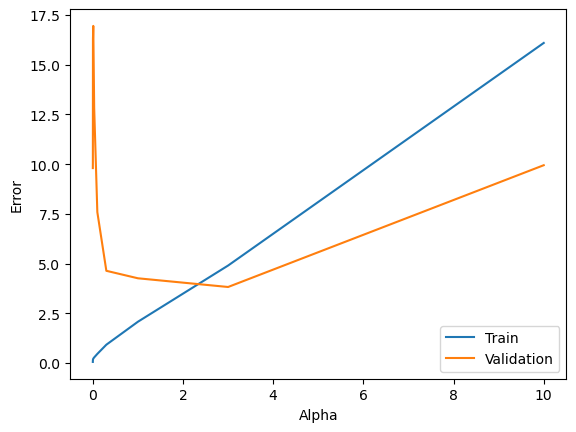

In [35]:
# ====================
#  Jangan diubah ya
# ====================
alpha_vec, error_train, error_val = \
validation_curve(X_poly, y, X_poly_val, yval)

plt.figure()
plt.plot(alpha_vec, error_train, alpha_vec, error_val)
plt.legend(['Train', 'Validation'])
plt.xlabel('Alpha')
plt.ylabel('Error')


### Pertanyaan Refleksi
Berdasarkan plot di atas, berapakah nilai $\alpha$ yang 
terbaik?     
**Hint**: Pilih $\alpha$ bilangan bulat. 
Dilihat nilai α yang terbaik adalah nilai yang memberikan 
error validasi terendah. Namun, dari plot tersebut, sulit 
untuk menentukan nilai α yang tepat hanya berdasarkan visualisasi. 
Jadi, mungkin perlu mencetak nilai error validasi minimum 
dan α yang sesuai untuk menentukan nilai α yang terbaik.

## 3.4 Hitung error pada test set 

Finally, anda akan menghitung error pada test set atau yang biasa disebut _test error_.    
Sebelum anda menghitung _test error_, anda akan melatih model dengan menggunakan gabungan train set dan validation set dan best $\alpha$. 

Anda gabungkan `X_poly` dan `X_poly_val`.

In [52]:
#### Write Your Code Here ####
X_train_final = np.vstack((X_poly, X_poly_val))

Anda gabungkan `y` dan `yval`.

In [53]:
#### Write Your Code Here ####
y_train_final = np.concatenate((y, yval))

Hitunglah $\theta$ yang merupakan hasil latih linear regression dengan $\alpha$ terbaik.    
**Hint**: Gunakan fungsi `train_linear_reg`

In [54]:
#### Write Your Code Here ####
alpha_best = 1 
theta_final = train_linear_reg(X_train_final, y_train_final, alpha_best)

Hitunglah test error dengan pada `X_poly_test` dan `ytest`.    

**Hint**: Gunakan fungsi `linear_reg_cost_function`

In [55]:
#### Write Your Code Here ####
linear_reg_cost_function(theta_final, X_poly_test, ytest, alpha_best)

(6.829422679371101,
 array([-0.926879, -0.413521, -0.347935, -0.529701, -0.848761, -0.168938,
        -1.421994,  0.495125, -2.151714]))

<center><h1>The End</h1></center>